<a href="https://colab.research.google.com/github/Mohamad-Selawy/ML-Model-s/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pandas Read csv files and return a DataFrame object
#sklearn from the sklearn module use the LinearRegression() method to create a linear regression object
#This object has a method called fit() that takes the features values and dependent values as parameters
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

#To split data into training and testing we need to import the following
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector

#r2 used to evaluate the regression model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student6.csv')

# Exploration

In [ ]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   16       R     GT3       T     1     1    other  services  ...   
1     MS   M   15       R     LE3       T     4     1   health  services  ...   
2     GP   M   19       R     GT3       T     3     2  at_home  services  ...   
3     GP   M   17       U     LE3       T     4     3  teacher     other  ...   
4     GP   F   17       R     GT3       T     3     4  at_home  services  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      3        3      3     1     2      1        8  12  11  11  
1      5        3      4     1     2      2        7   7   9   8  
2      5        3      4     2     2      5        0  11  10  10  
3      4        4      4     4     4      4        0  10  11  11  
4      4        3      4     2     5      5        2  15  15  17  

[5 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df[['age','G1','G2','G3']].describe()

age          G1          G2          G3
count  649.000000  649.000000  649.000000  649.000000
mean    16.682589   11.476117   11.668721   11.967643
std      1.211196    2.800981    3.035738    3.398965
min     15.000000    4.000000    0.000000    0.000000
25%     16.000000   10.000000   10.000000   10.000000
50%     17.000000   12.000000   12.000000   12.000000
75%     18.000000   13.000000   13.000000   14.000000
max     21.000000   19.000000   18.000000   18.000000

<ipython-input-10-ce9d101a9b7e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr()


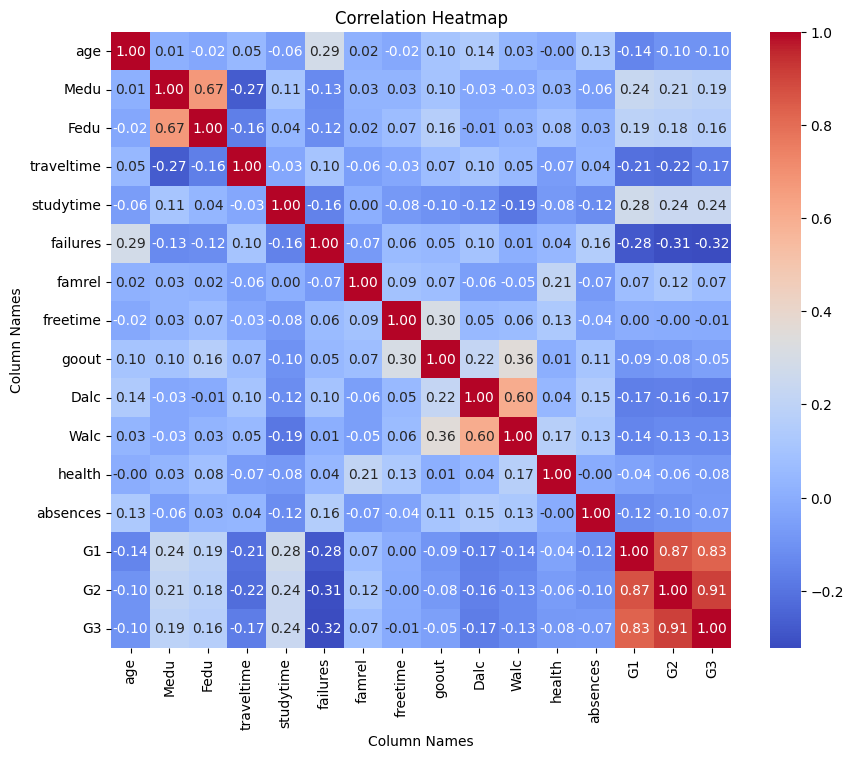

In [ ]:
# Assuming df is your DataFrame
# Generate correlation table
correlation_table = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn with column names on both axes
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10},
            xticklabels=correlation_table.columns, yticklabels=correlation_table.columns)

# Set title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Column Names')
plt.ylabel('Column Names')

# Show the plot
plt.show()

# Visualization

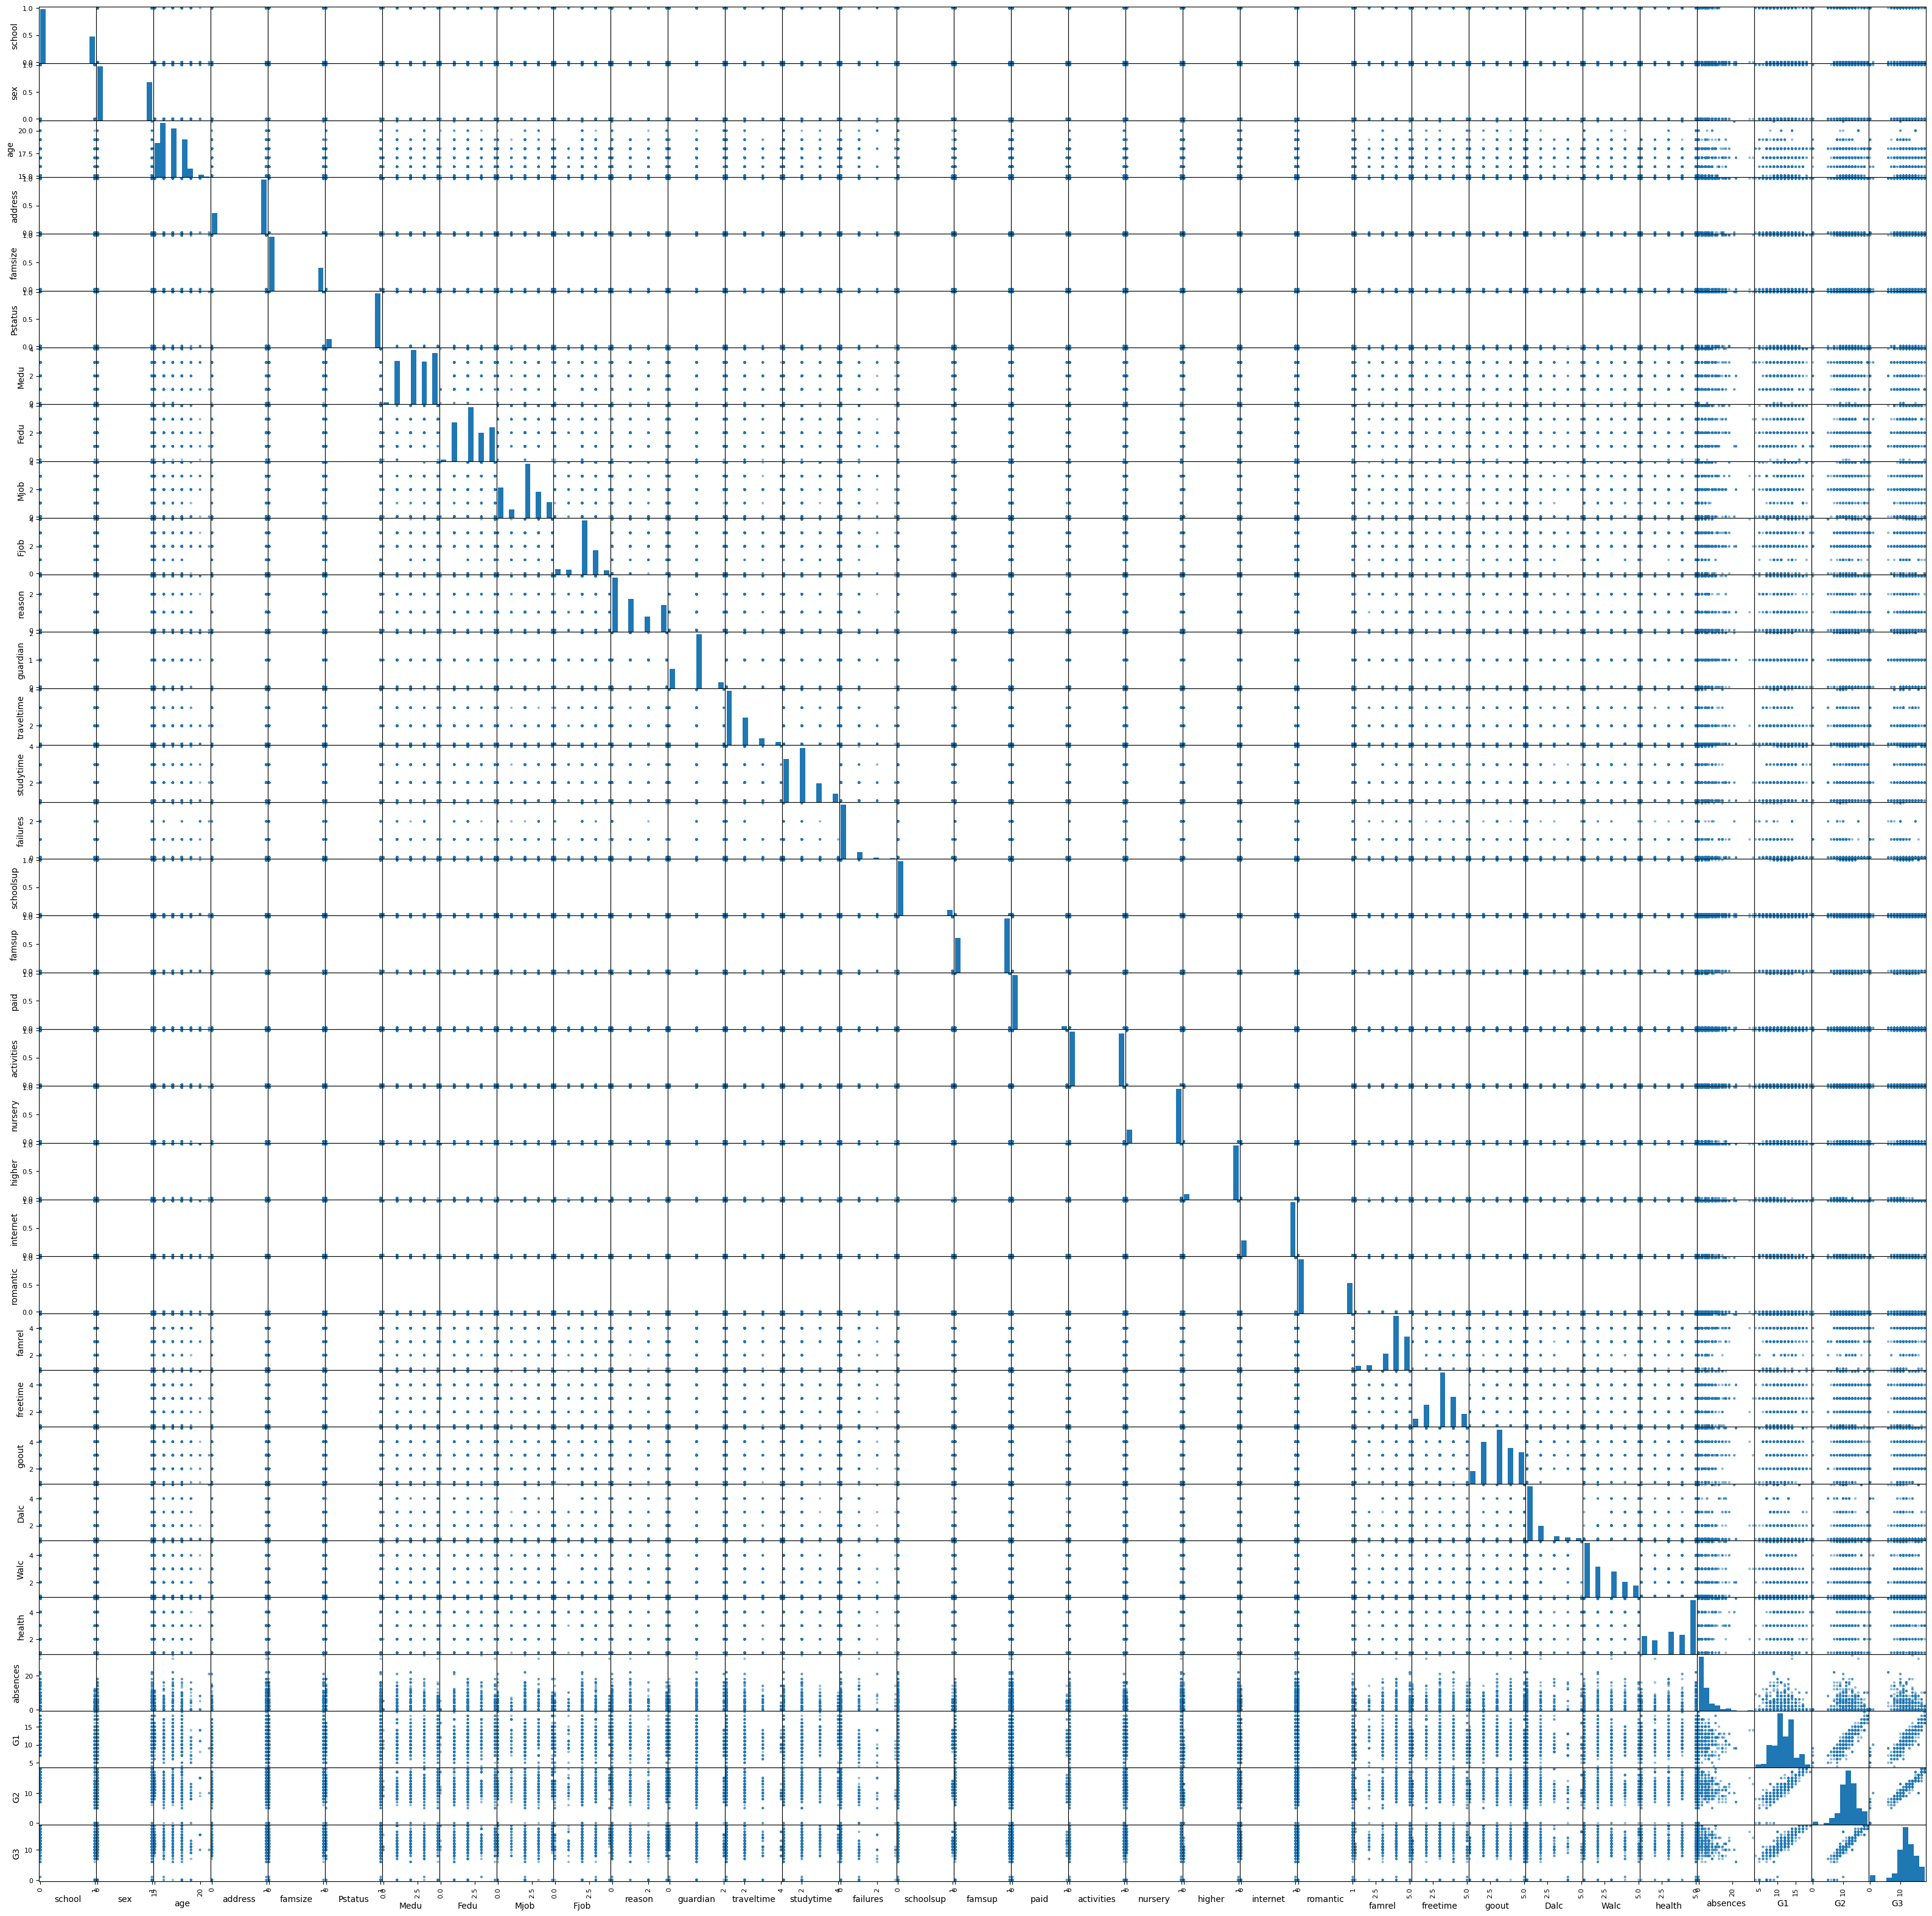

In [ ]:
#Visualize data using scatter plot matrix#
#You can also use from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df,figsize=(40,40))
plt.show()

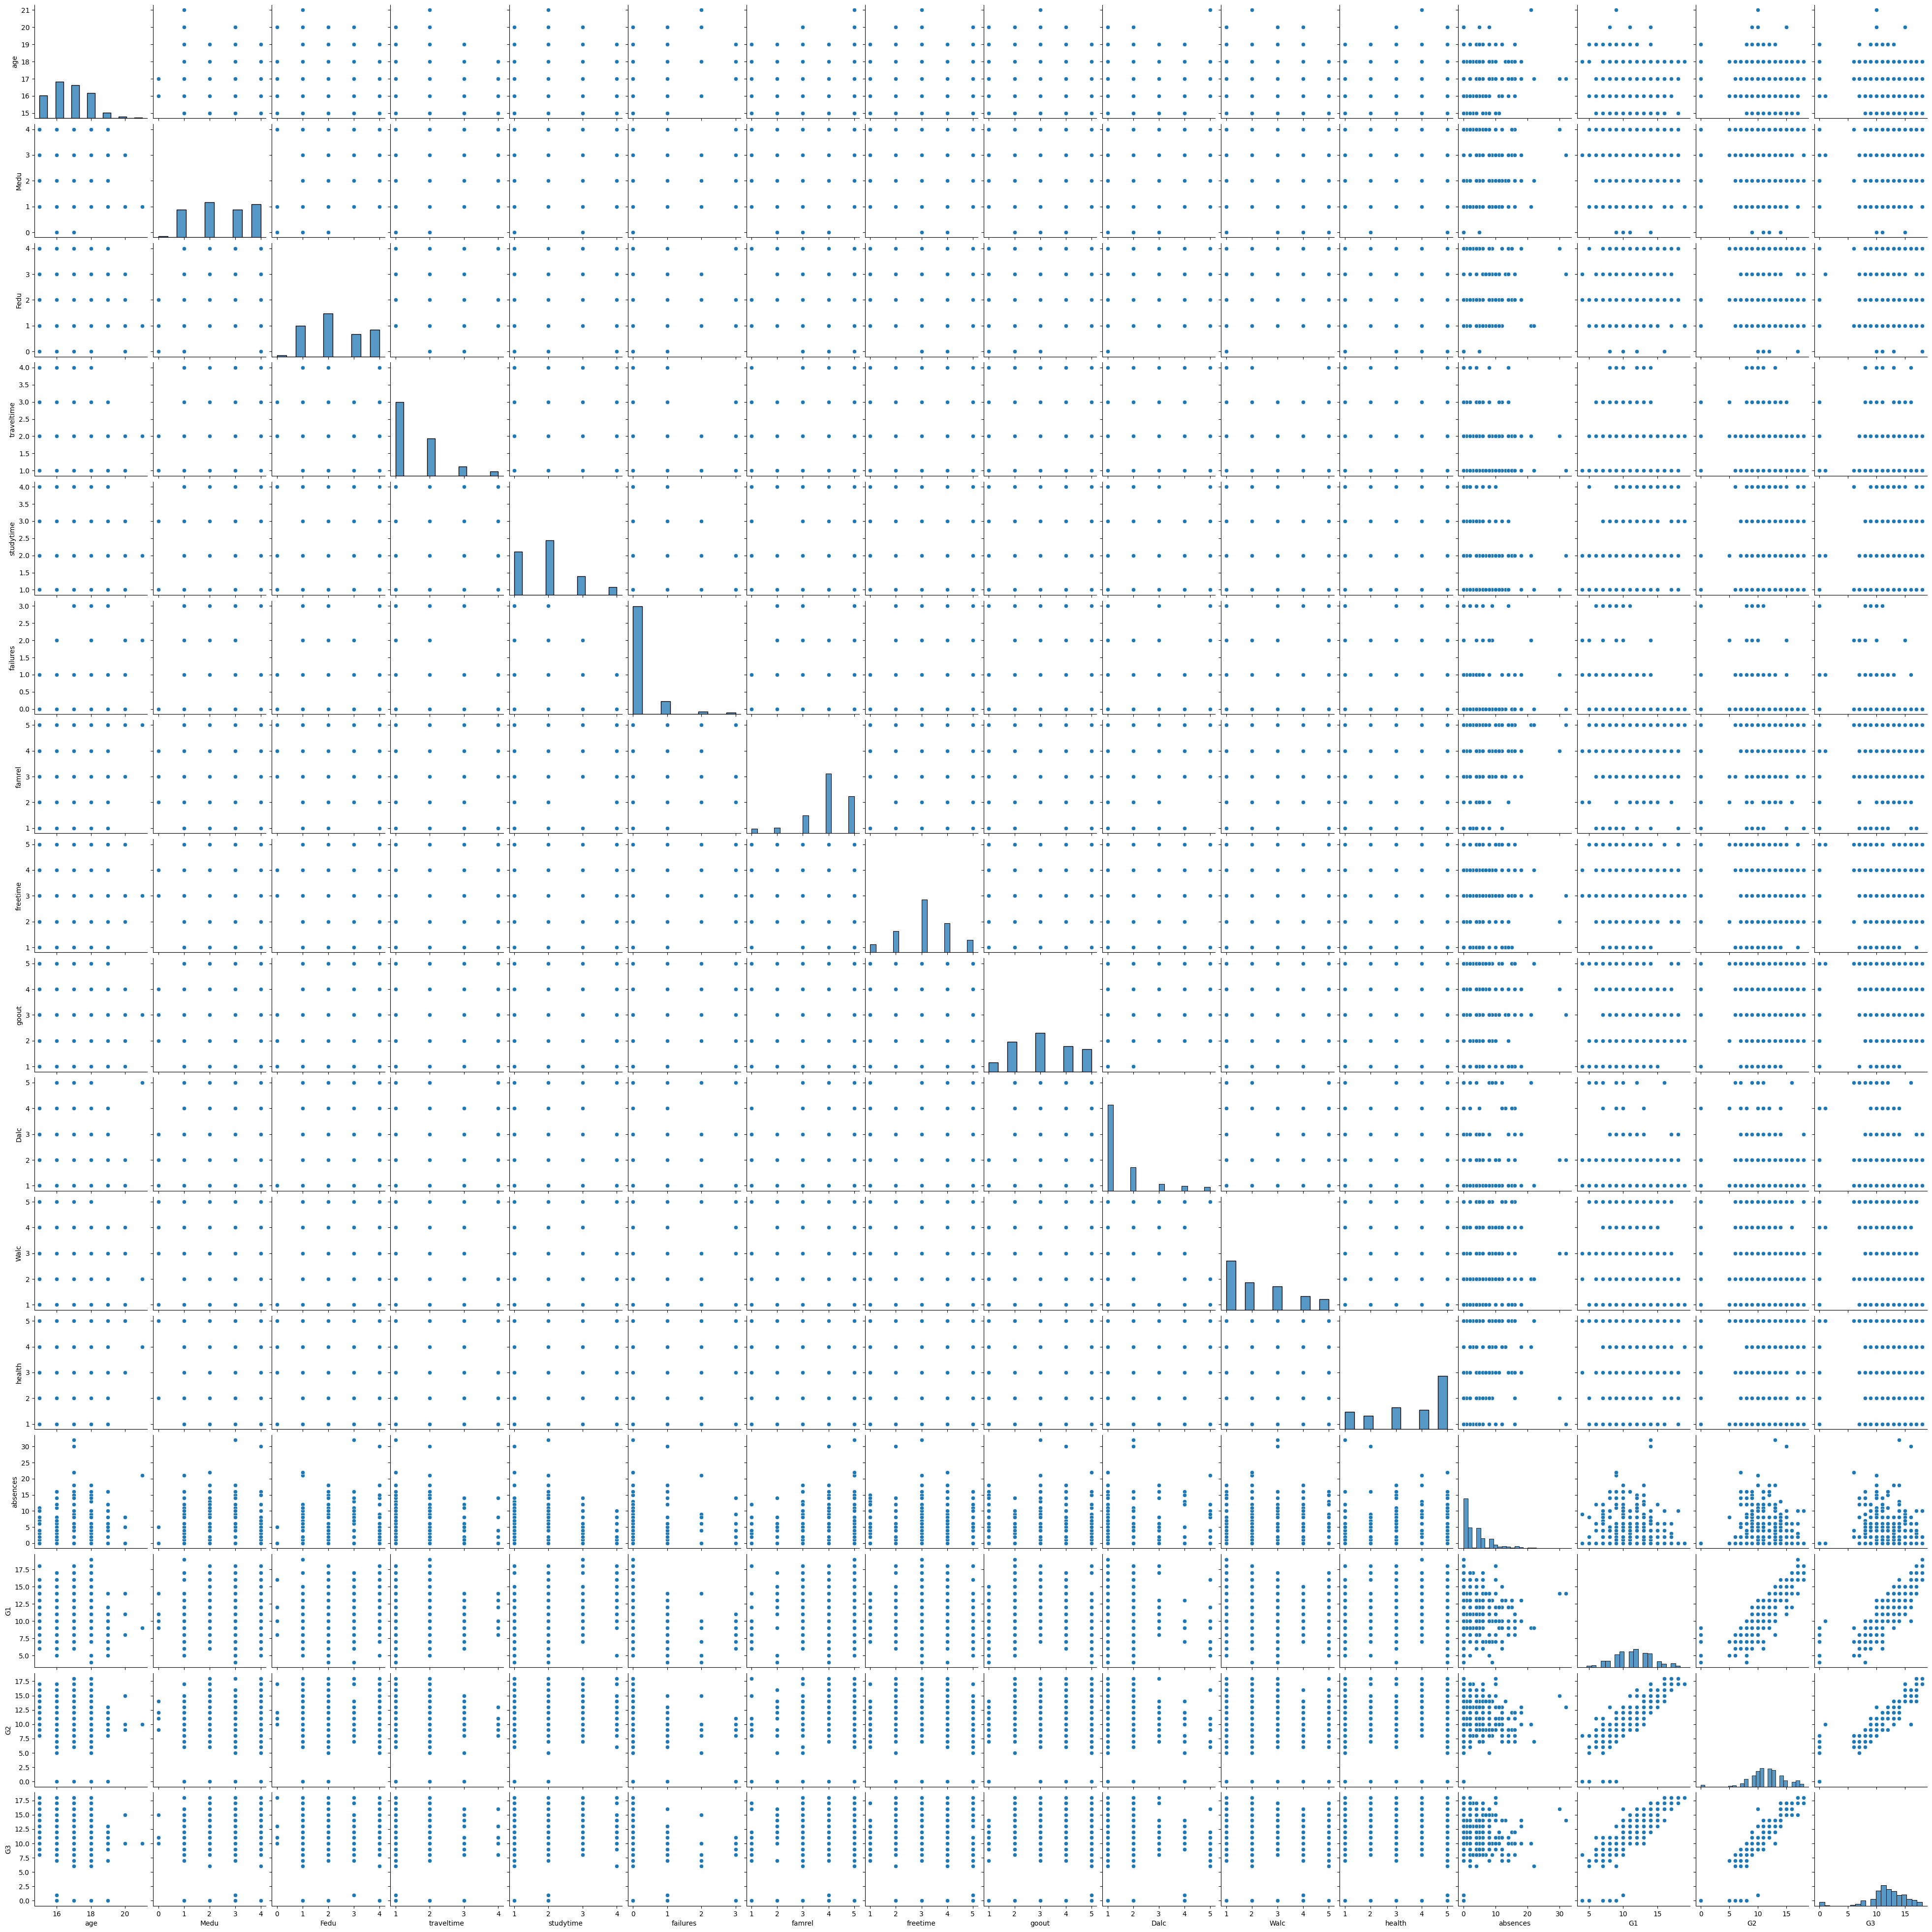

In [ ]:
sns.pairplot(df)
plt.show()

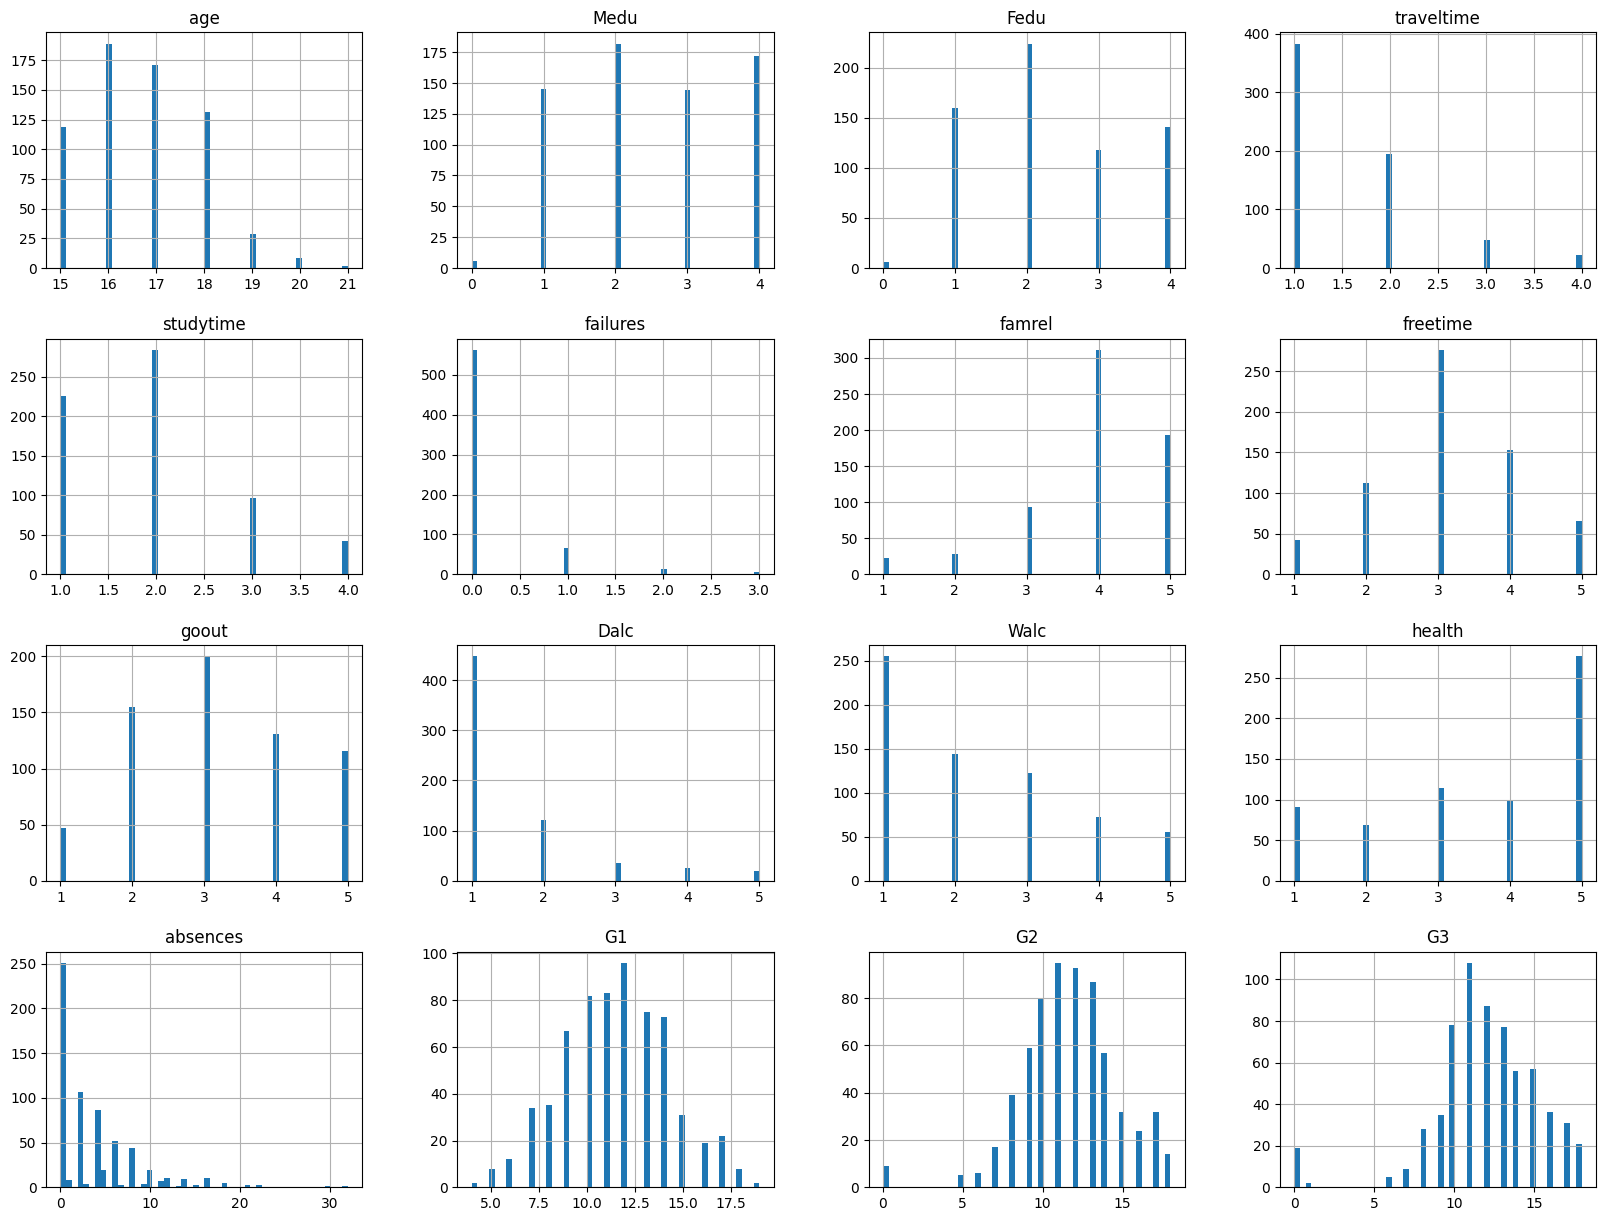

In [ ]:
#Visualize data using histogram#

df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
def visualization_features(df):
    for column in df.columns:
        if df[column].dtype == 'O':
            fig = px.histogram(df,
                               x=df[column],
                               color_discrete_sequence=['red'])
            fig.update_layout(title=dict(text=f'Distribution of {column}', x=0.5, font=dict(size=25)), bargap=0.1)
            fig.show()
        else:
            fig = px.histogram(df,
                               x=df[column],
                               marginal='box',
                               color_discrete_sequence=['darkblue']
                               #color_discrete_map={'black': 'black'}
                              )
            fig.update_layout(title=dict(text=f'Distribution of {column}', x=0.5, font=dict(size=25)), bargap=0.1)
            fig.show()
visualization_features(df)

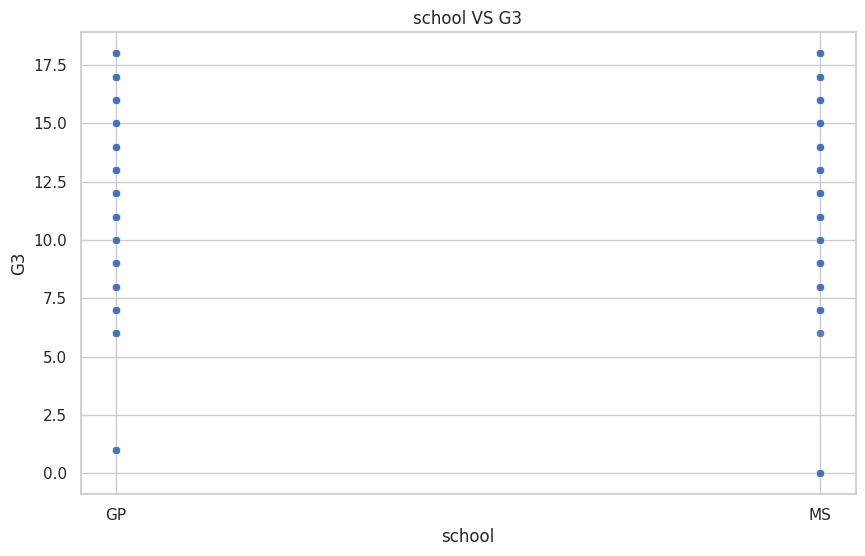

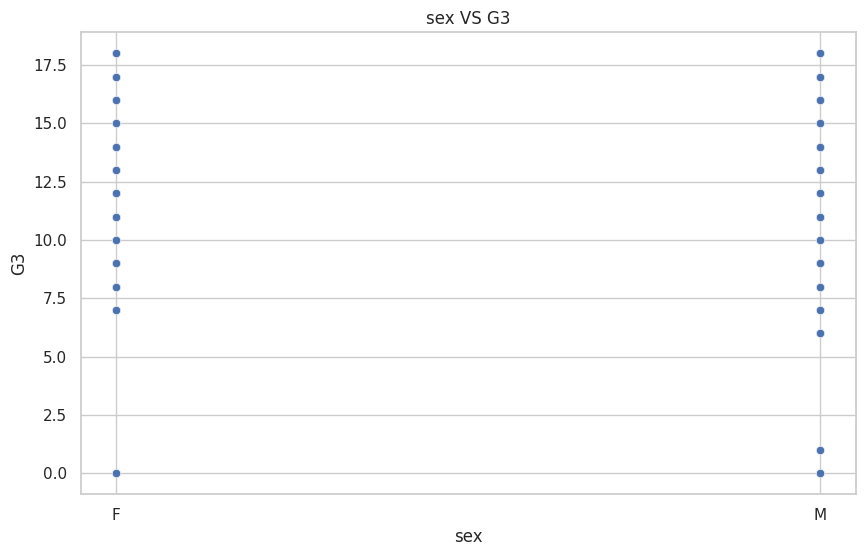

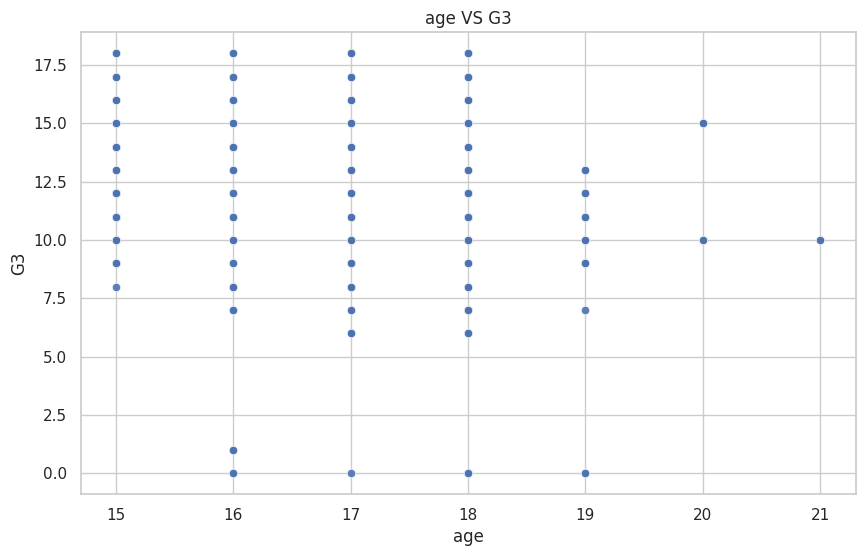

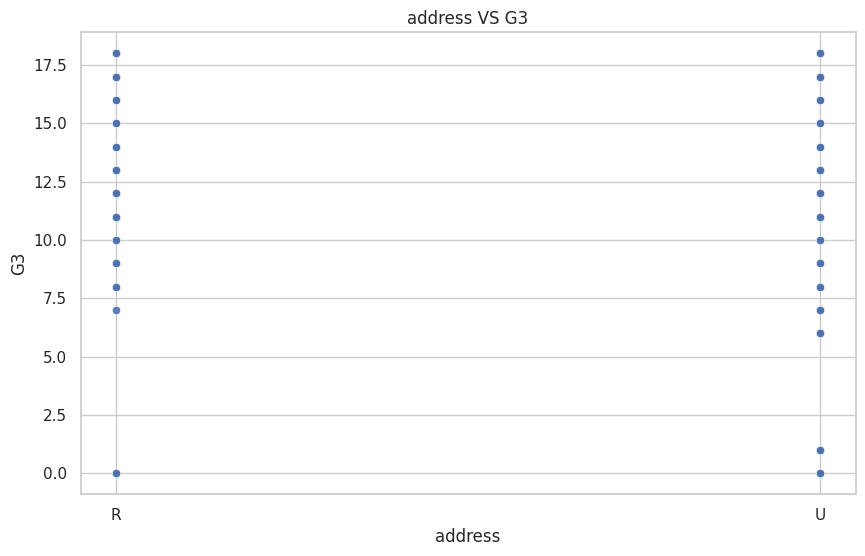

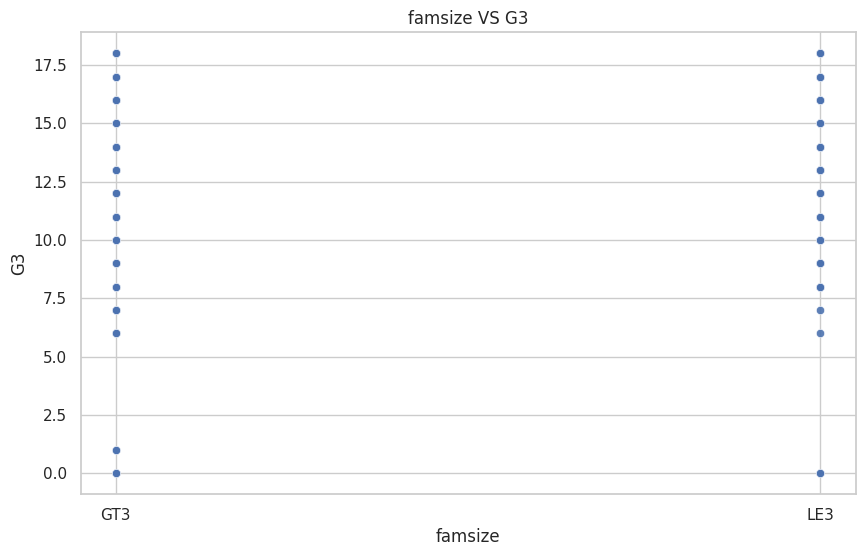

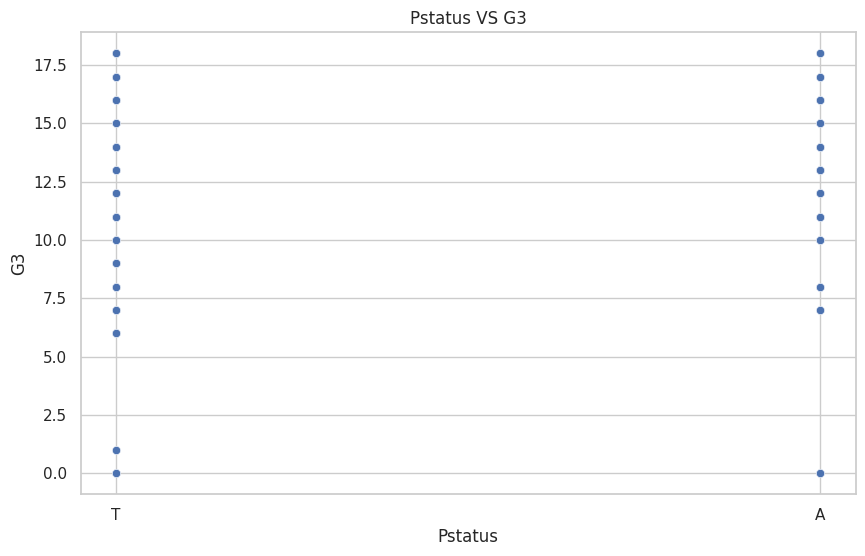

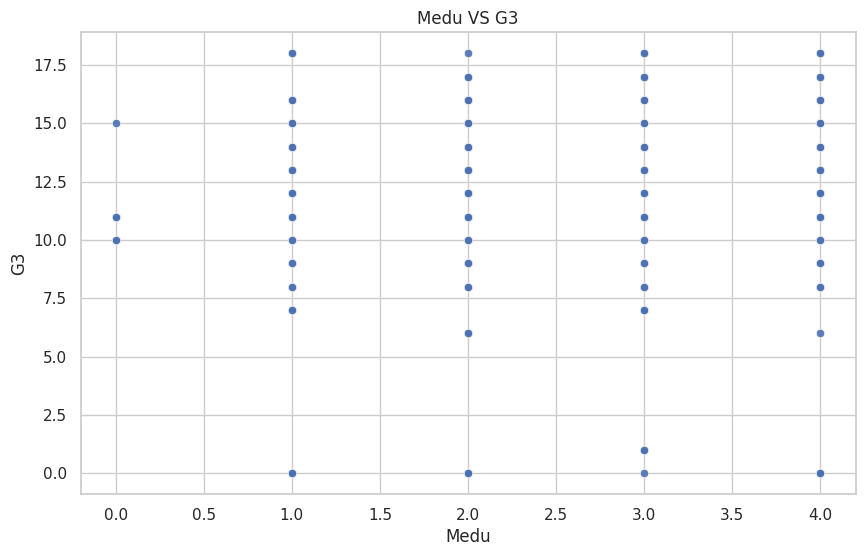

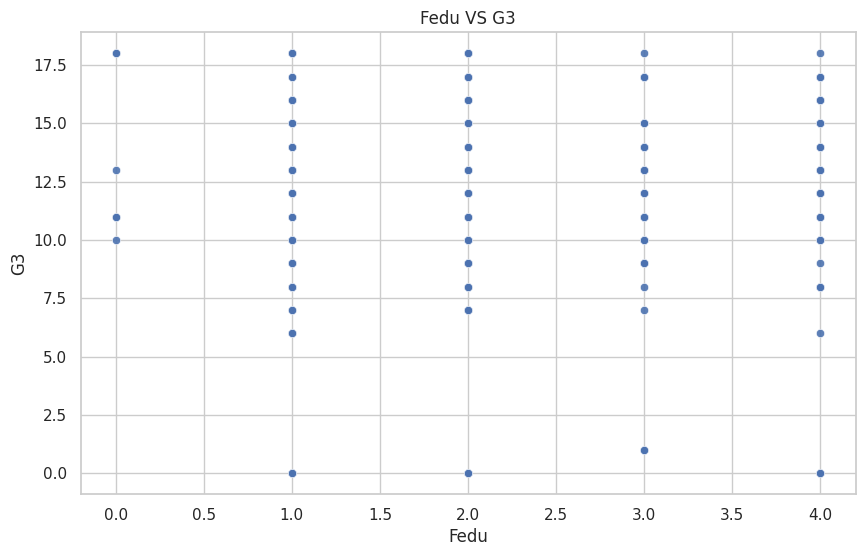

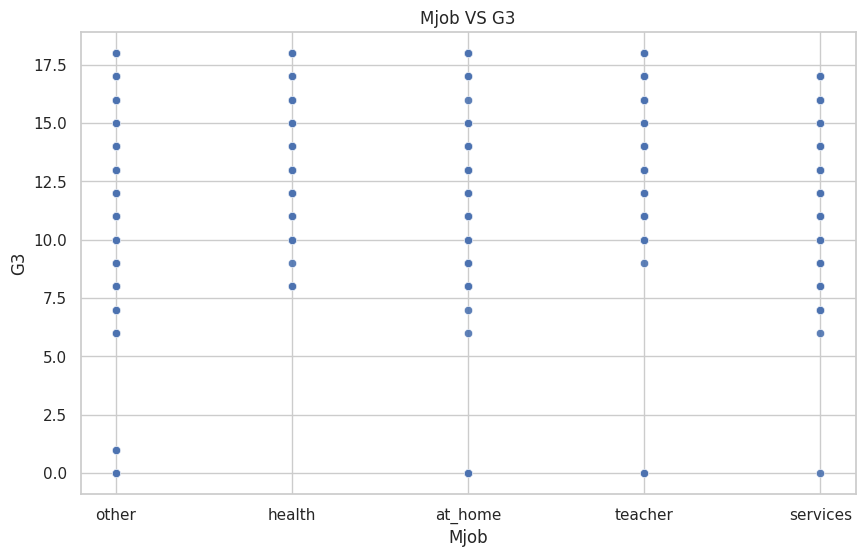

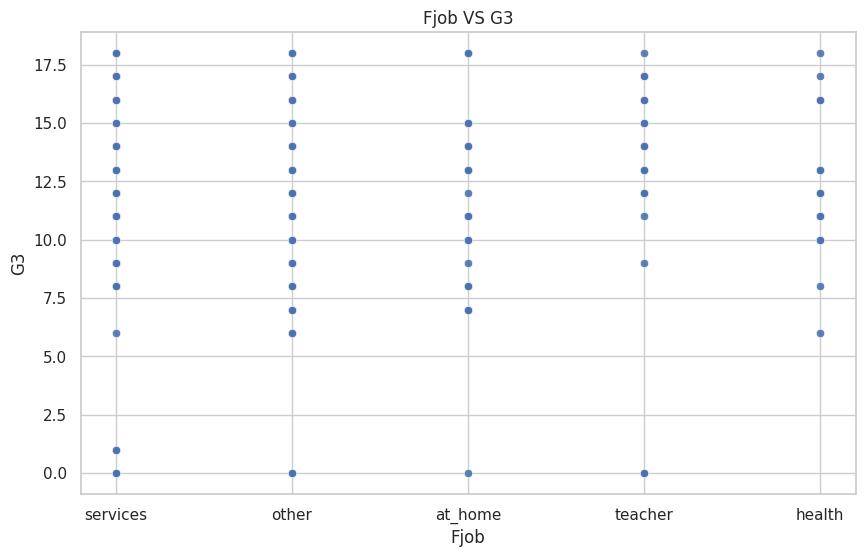

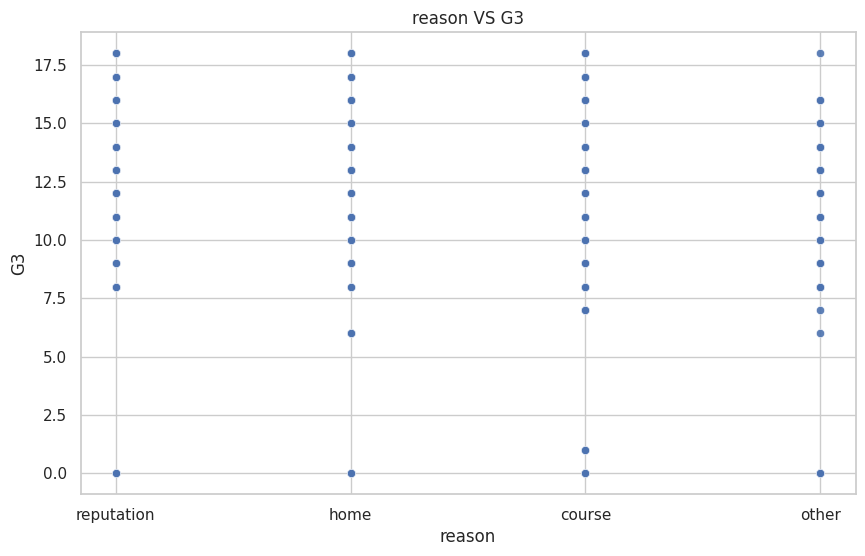

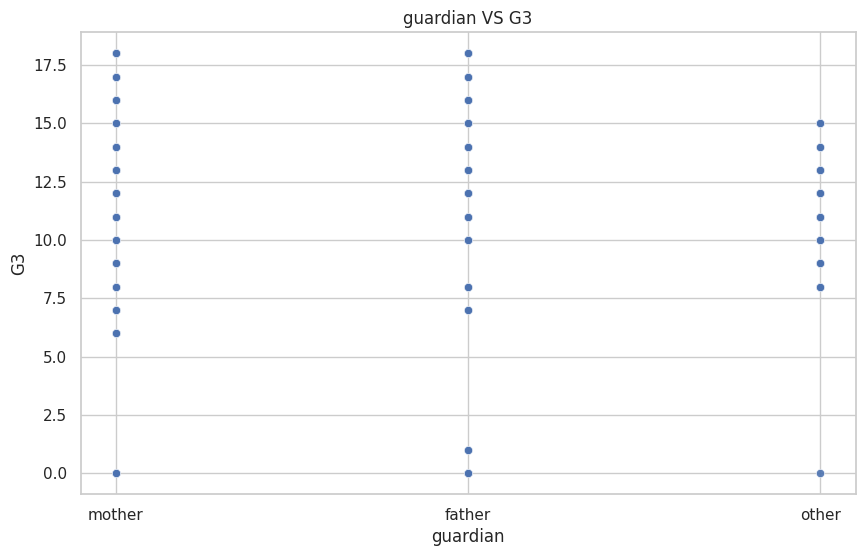

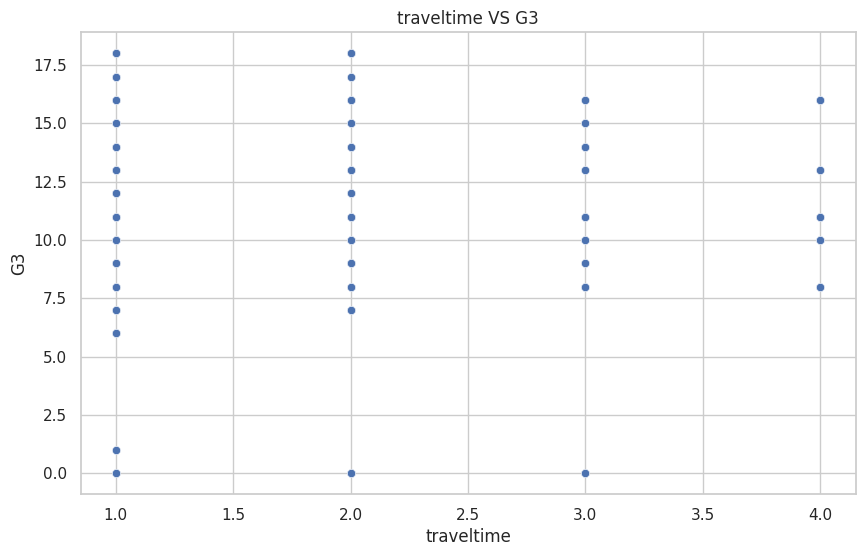

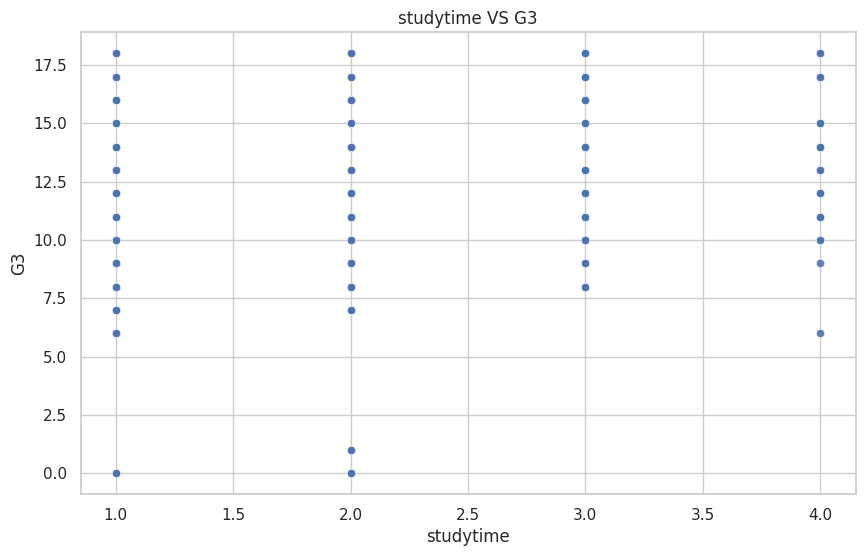

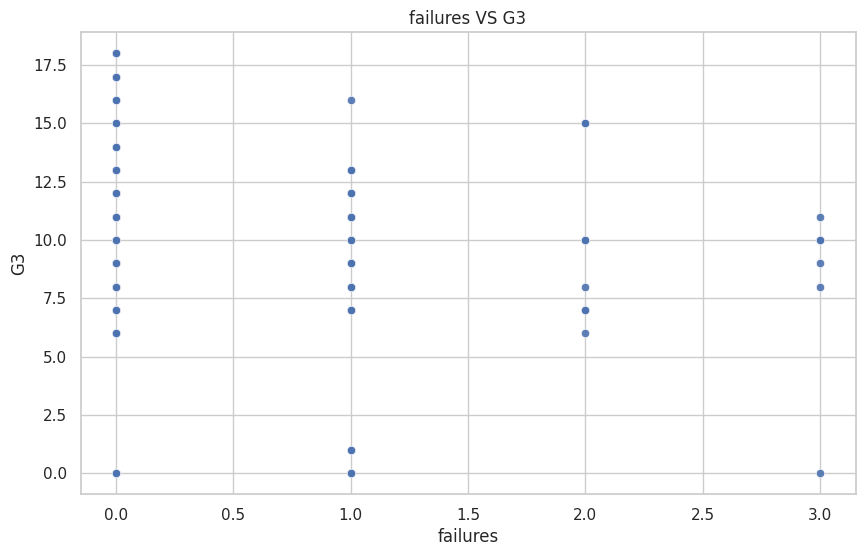

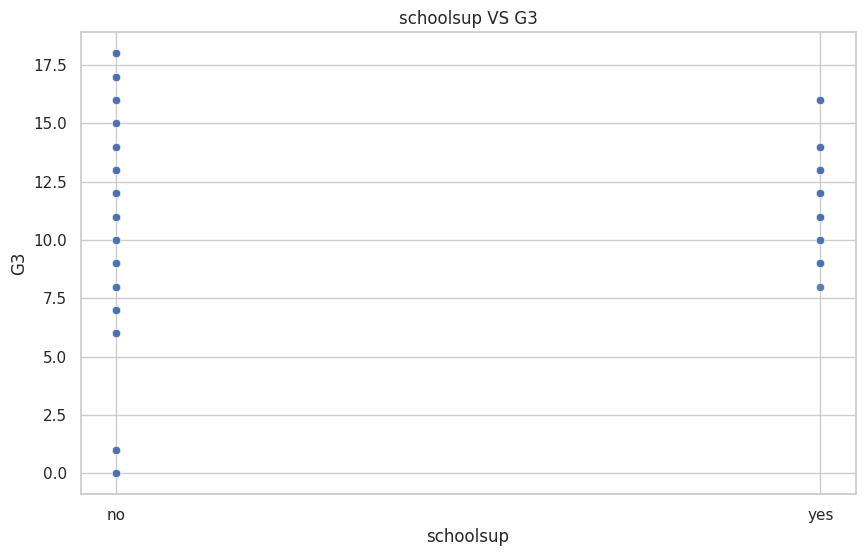

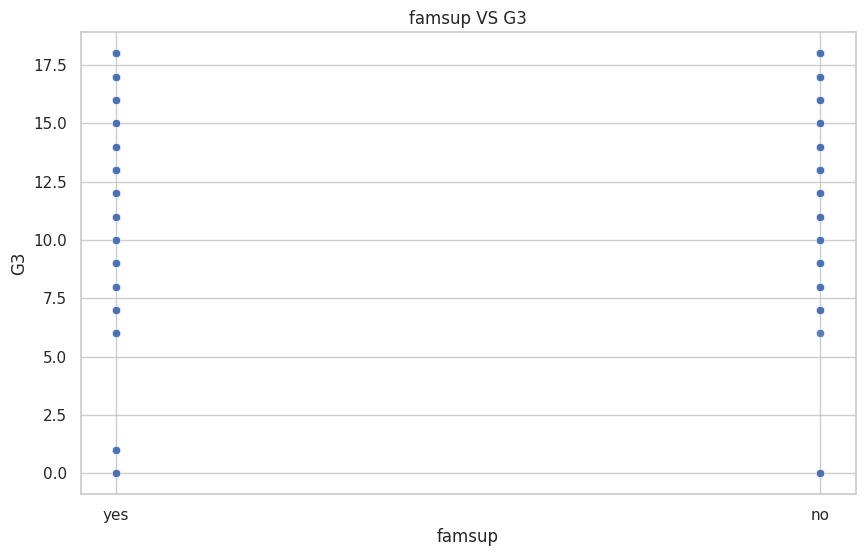

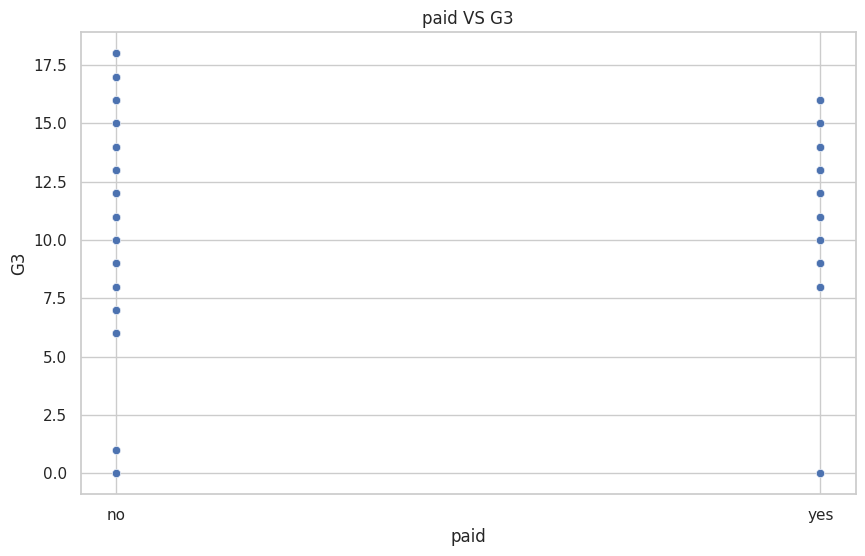

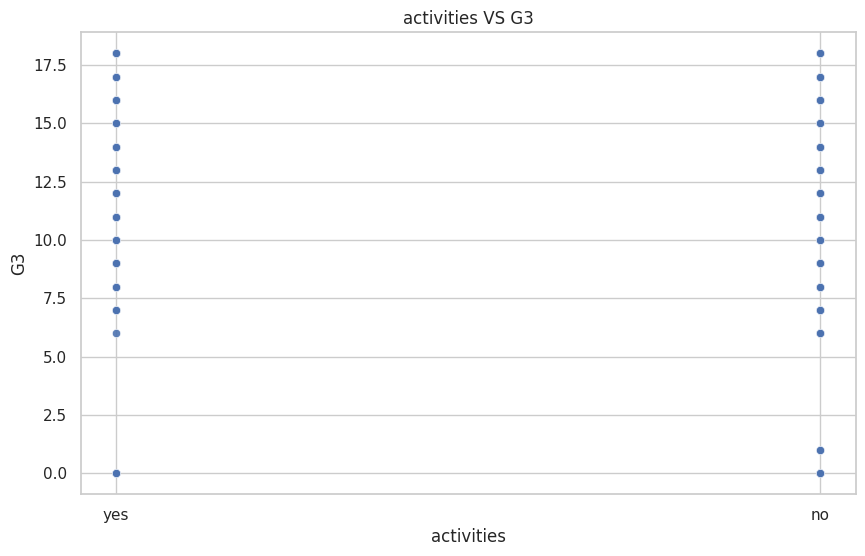

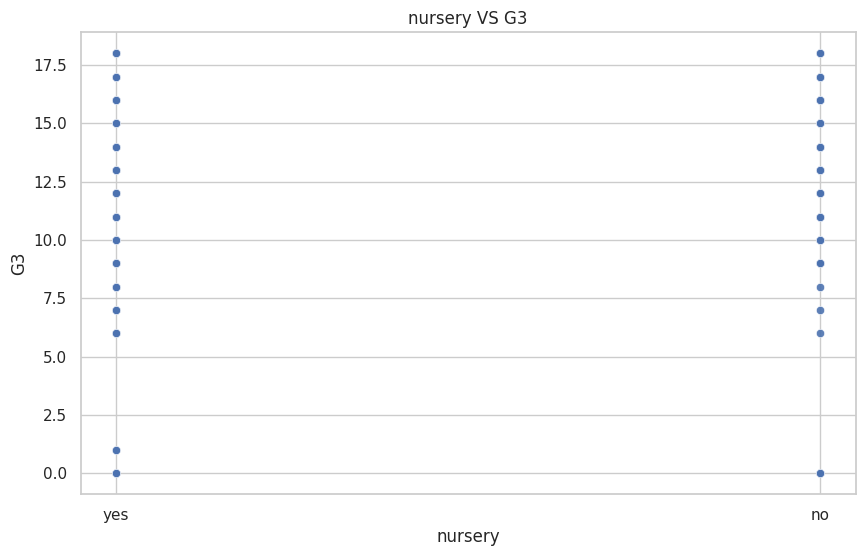

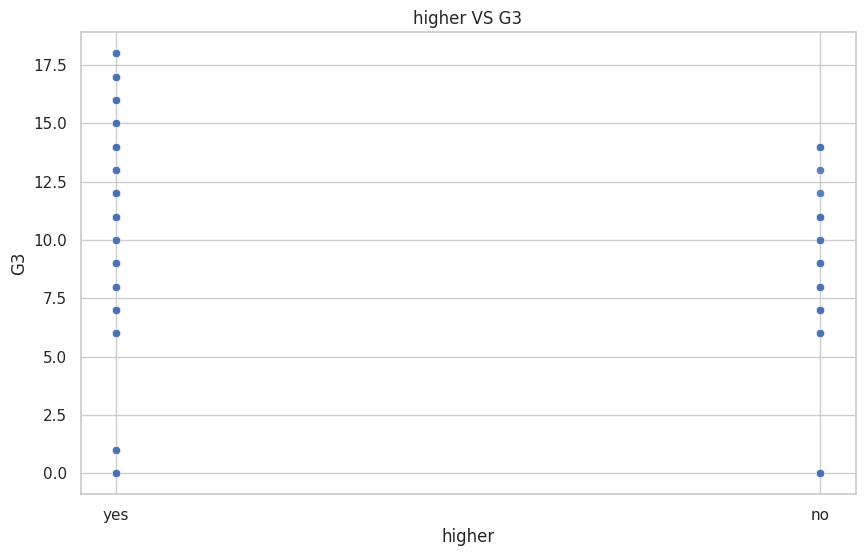

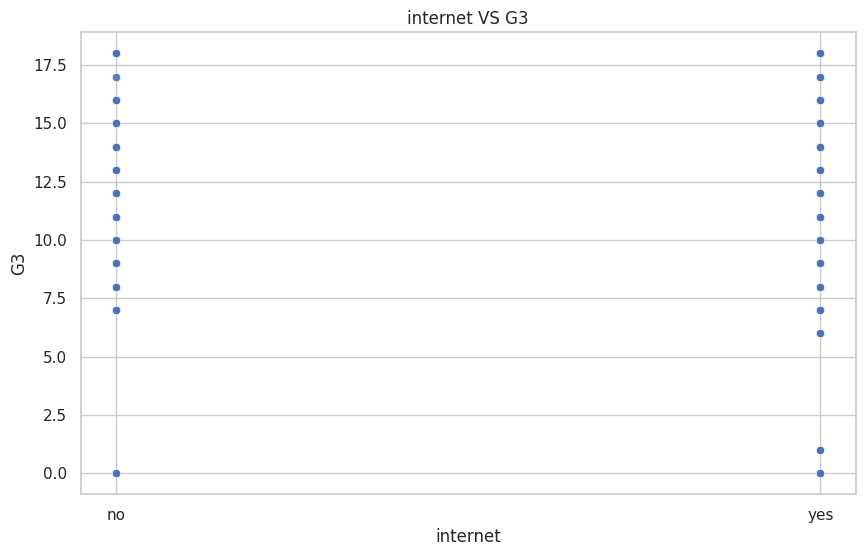

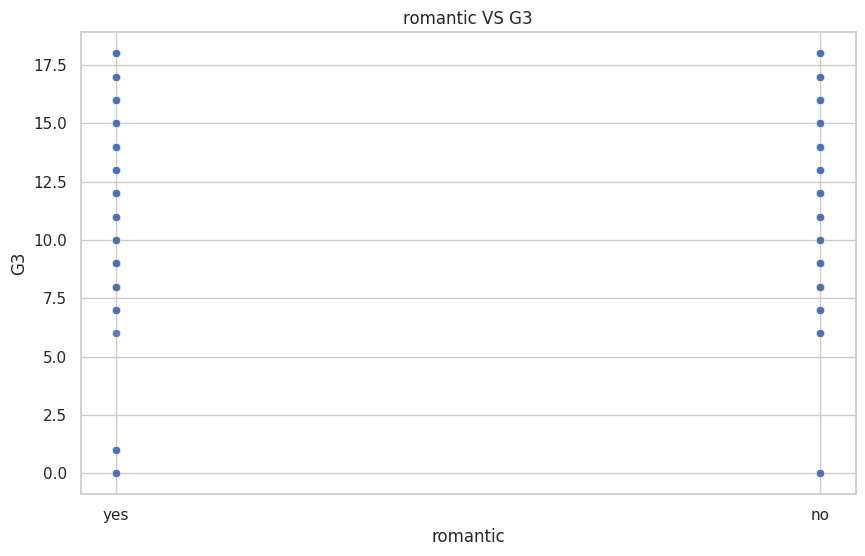

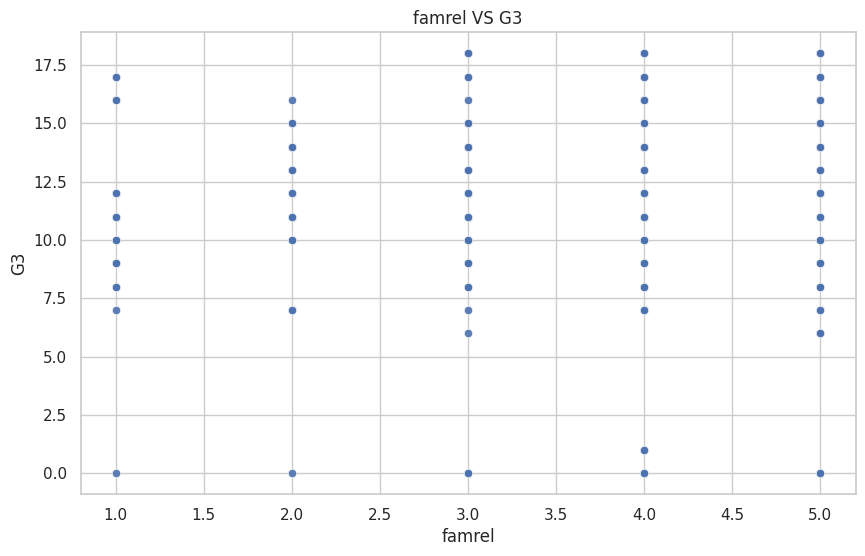

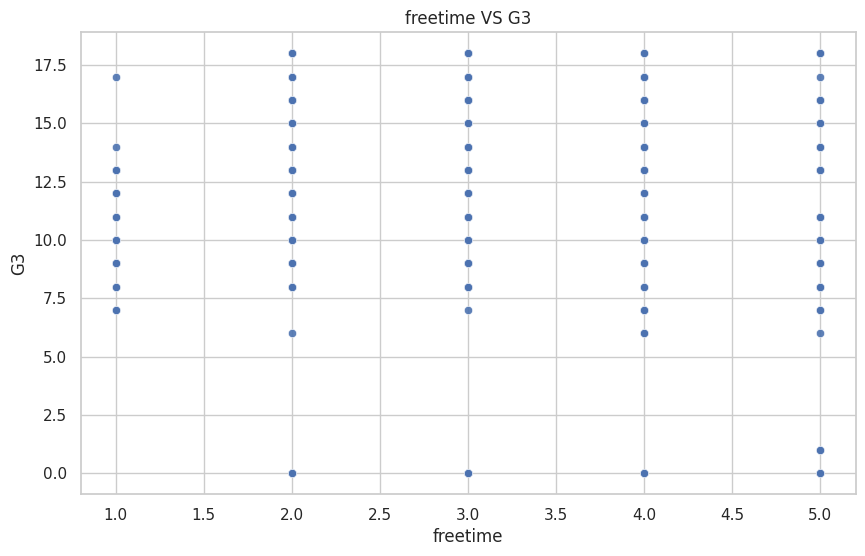

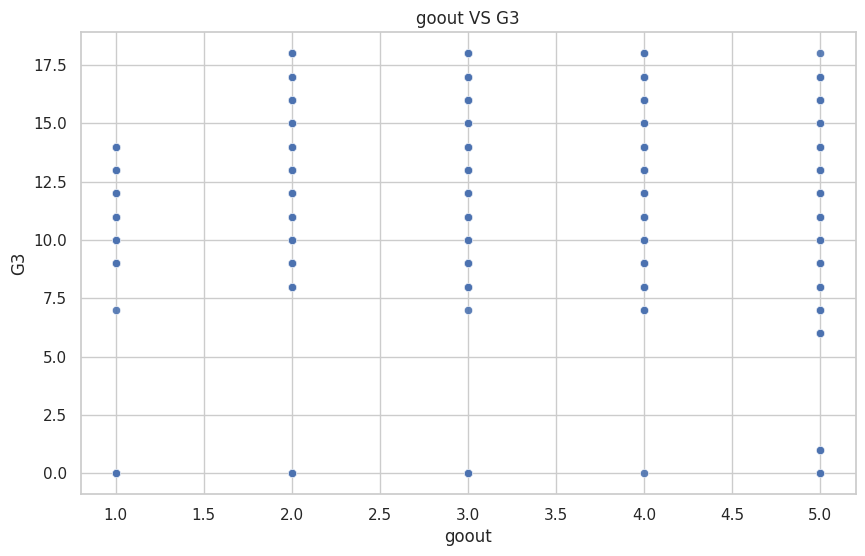

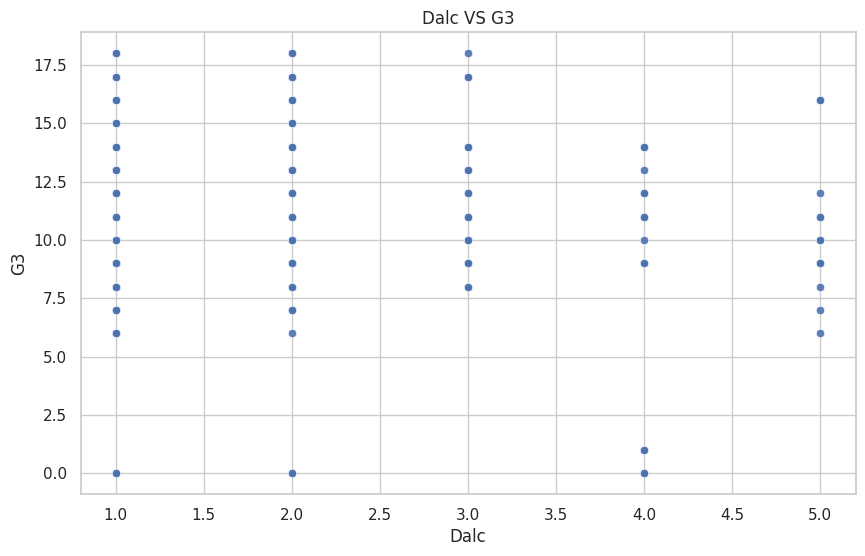

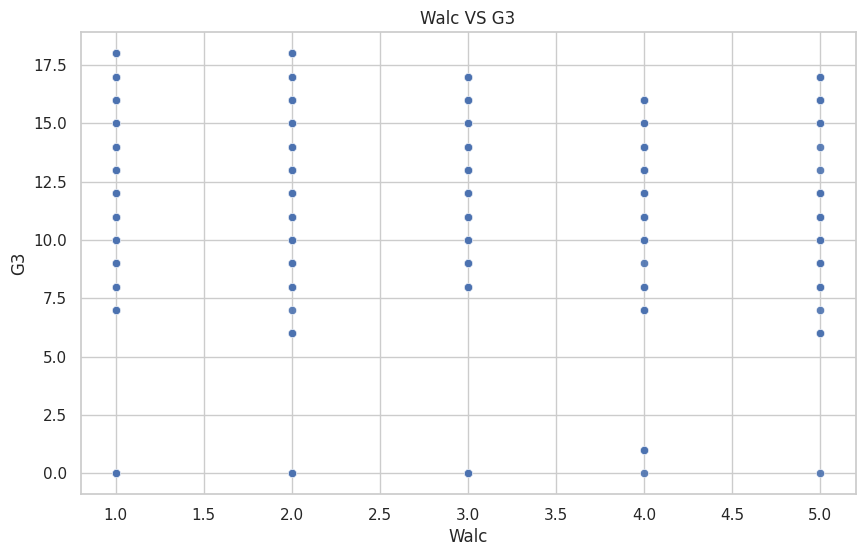

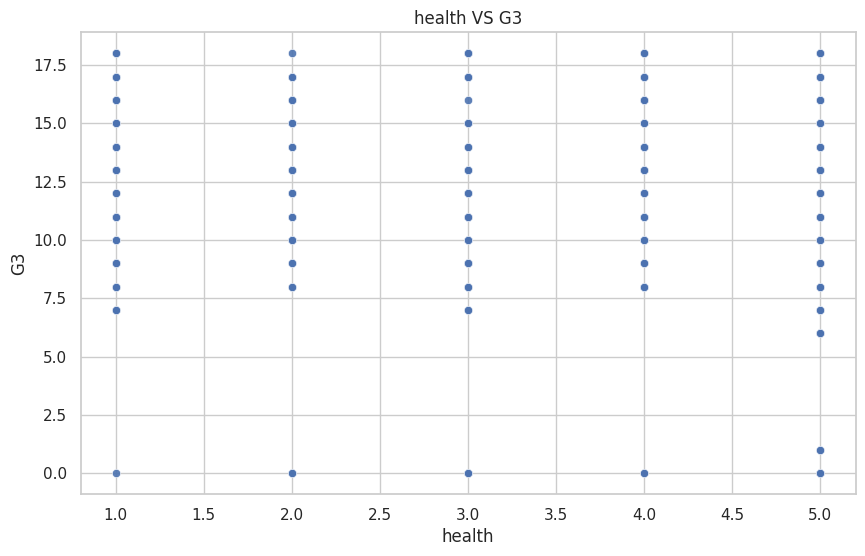

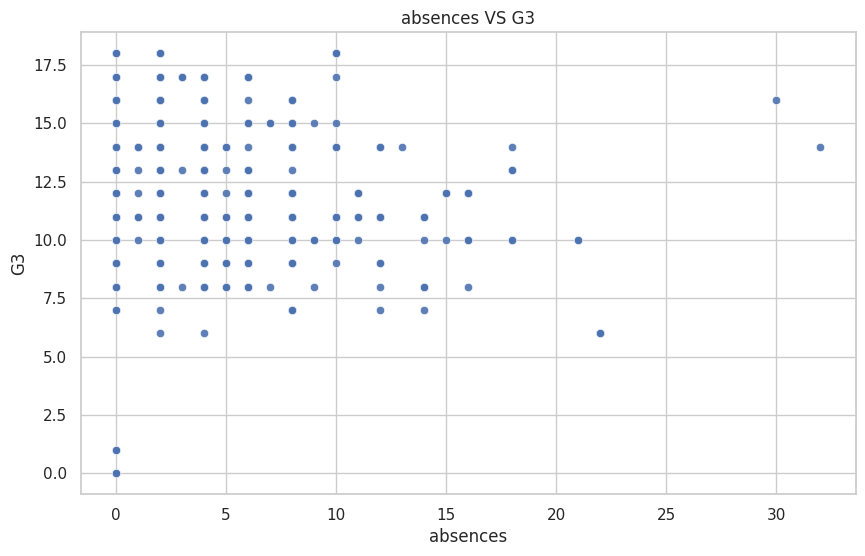

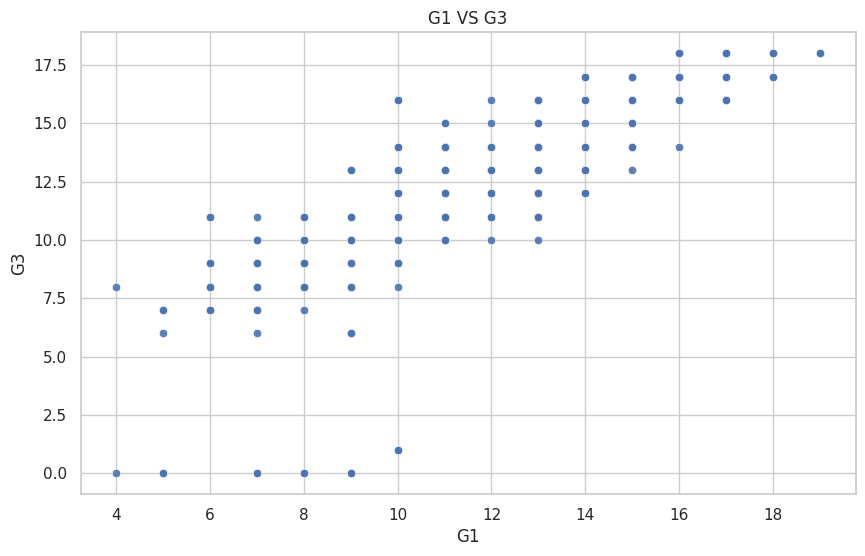

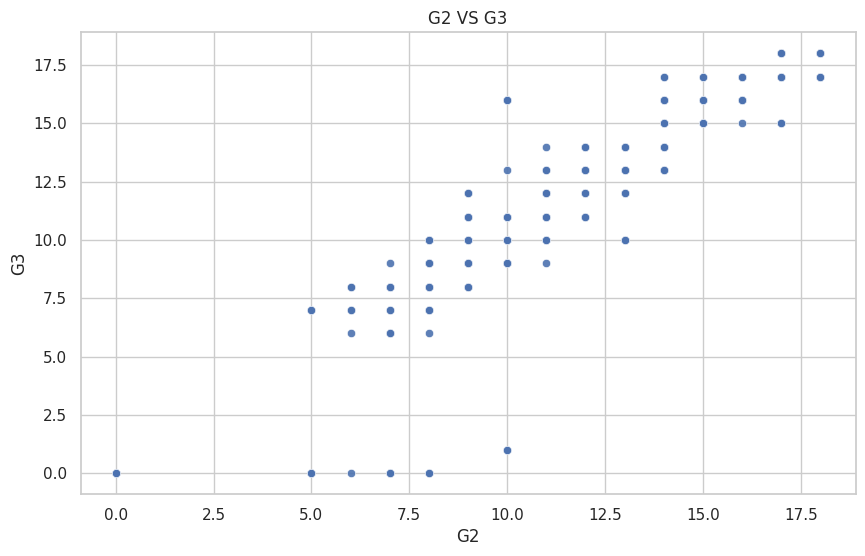

In [ ]:
sns.set(style="whitegrid")

# Create scatter plots for each feature against G3
features = df.iloc[:, 0:32]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='G3', data=df, alpha=0.9)
    plt.title(f'{feature} VS G3')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.show()

# Data Preprocessing

In [ ]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [ ]:
data_categorical = df[categorical_columns]
data_categorical.head()

school sex address famsize Pstatus     Mjob      Fjob      reason guardian  \
0     GP   F       R     GT3       T    other  services  reputation   mother   
1     MS   M       R     LE3       T   health  services  reputation   father   
2     GP   M       R     GT3       T  at_home  services        home    other   
3     GP   M       U     LE3       T  teacher     other      course   mother   
4     GP   F       R     GT3       T  at_home  services      course   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0        no    yes   no        yes     yes    yes       no      yes  
1        no    yes   no        yes     yes    yes      yes       no  
2        no    yes   no         no      no    yes       no      yes  
3        no     no   no        yes     yes    yes      yes       no  
4        no    yes   no        yes      no    yes      yes       no

In [ ]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 17 features


In [ ]:
label_encode = LabelEncoder()

In [ ]:
for column in categorical_columns:
      df[column] = label_encode.fit_transform(df[column])

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df[categorical_columns]

school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0         0    0        0        0        1     2     3       3         1   
1         1    1        0        1        1     1     3       3         0   
2         0    1        0        0        1     0     3       1         2   
3         0    1        1        1        1     4     2       0         1   
4         0    0        0        0        1     0     3       0         0   
..      ...  ...      ...      ...      ...   ...   ...     ...       ...   
644       0    1        1        0        1     0     2       0         1   
645       0    1        1        0        1     2     2       1         0   
646       0    0        1        1        1     2     0       0         0   
647       0    0        1        0        1     0     3       0         1   
648       0    1        1        1        1     4     2       0         1   

     schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  
0            0       1     0           1        1       1         0         1  
1            0       1     0           1        1       1         1         0  
2            0       1     0           0        0       1         0         1  
3            0       0     0           1        1       1         1         0  
4            0       1     0           1        0       1         1         0  
..         ...     ...   ...         ...      ...     ...       ...       ...  
644          0       0     0           0        1       1         0         0  
645          0       0     0           0        1       1         1         0  
646          1       0     0           1        1       1         1         0  
647          0       0     0           1        1       1         1         0  
648          0       0     0           1        0       1         1         0  

[649 rows x 17 columns]

In [ ]:
df.loc[:,df.columns != 'G3'] = (df.loc[:,df.columns != 'G3'] - df.loc[:,df.columns != 'G3'].min()) / (df.loc[:,df.columns != 'G3'].max() - df.loc[:,df.columns != 'G3'].min())

<ipython-input-182-8ee68025cb2c>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns != 'G3'] = (df.loc[:,df.columns != 'G3'] - df.loc[:,df.columns != 'G3'].min()) / (df.loc[:,df.columns != 'G3'].max() - df.loc[:,df.columns != 'G3'].min())


In [ ]:
df #after normaliziation

school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0.0  0.0  0.166667      0.0      0.0      1.0  0.25  0.25  0.50  0.75   
1       1.0  1.0  0.000000      0.0      1.0      1.0  1.00  0.25  0.25  0.75   
2       0.0  1.0  0.666667      0.0      0.0      1.0  0.75  0.50  0.00  0.75   
3       0.0  1.0  0.333333      1.0      1.0      1.0  1.00  0.75  1.00  0.50   
4       0.0  0.0  0.333333      0.0      0.0      1.0  0.75  1.00  0.00  0.75   
..      ...  ...       ...      ...      ...      ...   ...   ...   ...   ...   
644     0.0  1.0  0.166667      1.0      0.0      1.0  0.50  0.25  0.00  0.50   
645     0.0  1.0  0.166667      1.0      0.0      1.0  0.50  0.75  0.50  0.50   
646     0.0  0.0  0.166667      1.0      1.0      1.0  0.50  0.50  0.50  0.00   
647     0.0  0.0  0.333333      1.0      0.0      1.0  0.25  0.25  0.00  0.75   
648     0.0  1.0  0.166667      1.0      1.0      1.0  1.00  0.75  1.00  0.50   

     ...  famrel  freetime  goout  Dalc  Walc  health  absences        G1  \
0    ...    0.50      0.50   0.50  0.00  0.25    0.00   0.25000  0.533333   
1    ...    1.00      0.50   0.75  0.00  0.25    0.25   0.21875  0.200000   
2    ...    1.00      0.50   0.75  0.25  0.25    1.00   0.00000  0.466667   
3    ...    0.75      0.75   0.75  0.75  0.75    0.75   0.00000  0.400000   
4    ...    0.75      0.50   0.75  0.25  1.00    1.00   0.06250  0.733333   
..   ...     ...       ...    ...   ...   ...     ...       ...       ...   
644  ...    0.50      0.25   0.00  0.00  0.00    0.25   0.12500  0.333333   
645  ...    1.00      0.50   0.50  0.00  0.00    0.50   0.00000  0.600000   
646  ...    0.75      0.50   0.50  0.25  0.25    1.00   0.43750  0.400000   
647  ...    1.00      0.50   0.50  0.00  0.00    0.50   0.00000  0.533333   
648  ...    1.00      0.75   1.00  0.00  0.00    0.50   0.21875  0.666667   

           G2  G3  
0    0.611111  11  
1    0.500000   8  
2    0.555556  10  
3    0.611111  11  
4    0.833333  17  
..        ...  ..  
644  0.500000  11  
645  0.666667  12  
646  0.611111  11  
647  0.611111  12  
648  0.777778  15  

[649 rows x 33 columns]

# Selection Forward

In [ ]:
X = df.loc[:,df.columns != 'G3']
y = df['G3']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=142)

In [ ]:
LR= LinearRegression()
sfs = SequentialFeatureSelector(LR, k_features='best', forward=True, scoring='r2', cv=5).fit(X_train, y_train)
#sfs.fit(X_train, y_train)

In [ ]:
# SFS_LR.subsets_

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

feature_idx  \
1                                               (31,)   
2                                            (30, 31)   
3                                         (1, 30, 31)   
4                                      (1, 3, 30, 31)   
5                                  (1, 3, 12, 30, 31)   
6                               (0, 1, 3, 12, 30, 31)   
7                            (0, 1, 3, 9, 12, 30, 31)   
8                        (0, 1, 3, 9, 12, 19, 30, 31)   
9                     (0, 1, 3, 8, 9, 12, 19, 30, 31)   
10                (0, 1, 3, 8, 9, 12, 14, 19, 30, 31)   
11            (0, 1, 3, 8, 9, 12, 14, 19, 28, 30, 31)   
12         (0, 1, 3, 5, 8, 9, 12, 14, 19, 28, 30, 31)   
13     (0, 1, 3, 5, 8, 9, 12, 14, 16, 19, 28, 30, 31)   
14  (0, 1, 3, 5, 8, 9, 11, 12, 14, 16, 19, 28, 30,...   
15  (0, 1, 3, 5, 8, 9, 11, 12, 13, 14, 16, 19, 28,...   
16  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 19, ...   
17  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 19, ...   
18  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 19, ...   
19  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 19, ...   
20  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, ...   
21  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, ...   
22  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, ...   
23  (0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, ...   
24  (0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 1...   
25  (0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16...   
26  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...   
27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...   
28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.7456004477802635, 0.8089668612695121, 0.847...  0.822551   
2   [0.7542911512873821, 0.8079034565433294, 0.857...  0.827461   
3   [0.7644740567350401, 0.8099451235844868, 0.853...  0.831019   
4   [0.7694550074753439, 0.8135930294452154, 0.860...  0.834846   
5   [0.7782529812406902, 0.8130740829381234, 0.865...  0.836861   
6   [0.780295143685013, 0.81172696835964, 0.867064...  0.837961   
7   [0.7806612449116297, 0.8111632436670998, 0.866...  0.839275   
8   [0.7831653271335209, 0.8147018599316518, 0.868...   0.84023   
9   [0.7866148802128055, 0.8141926461417934, 0.867...  0.841077   
10  [0.7891571425405788, 0.8166253723904269, 0.865...  0.841629   
11  [0.7899423667386147, 0.8165542888678069, 0.864...  0.841967   
12  [0.7899925187000696, 0.8154227585412692, 0.863...  0.841745   
13  [0.7901691094068677, 0.8149787256250429, 0.862...  0.841558   
14  [0.7923426897699308, 0.8075717589224309, 0.865...  0.841375   
15  [0.7924936874394499, 0.8061004449686066, 0.865...  0.841001   
16  [0.7917614989796713, 0.8055503104982717, 0.866...  0.840652   
17  [0.7904021706709028, 0.8048374911333469, 0.866...   0.84017   
18  [0.7903504403763988, 0.801212918992036, 0.8659...  0.839643   
19  [0.7859884297501829, 0.8016240356476598, 0.866...  0.839104   
20  [0.7876947554066879, 0.8018191119381135, 0.868...  0.838399   
21  [0.7875581831490107, 0.8010823990974146, 0.865...  0.837444   
22  [0.7877067439810264, 0.799795773109879, 0.8621...  0.836908   
23  [0.7871185092609435, 0.7993462074911797, 0.861...  0.836235   
24  [0.7852336645643223, 0.7977110343394657, 0.861...  0.835406   
25  [0.7830726033760069, 0.7976600217372921, 0.861...  0.834453   
26  [0.7829451542438773, 0.7973807607123876, 0.861...  0.833969   
27  [0.7834227779243347, 0.7934062529171928, 0.858...  0.832838   
28  [0.785783100213107, 0.7917517688971569, 0.8508...  0.831812   
29  [0.785465298034969, 0.7924833994911009, 0.8476...  0.830683   
30  [0.7854830356319704, 0.7873174226782936, 0.848...  0.829451   
31  [0.7855400758033555, 0.7821246974981679, 0.847...  0.828127   
32  [0.784855657

# Selected features

In [ ]:
selected_features = list(X.columns[list(sfs.k_feature_idx_)])
selected_features

['school',
 'sex',
 'address',
 'Mjob',
 'Fjob',
 'traveltime',
 'failures',
 'nursery',
 'health',
 'G1',
 'G2']

# Hold Out

In [ ]:
# X = df.loc[:,df.columns != 'G3']
# y = df['G3']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=142)

# Linear Regression Model

In [ ]:
LR.fit(X_train[selected_features], y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
LR_pred = LR.predict(X_test[selected_features])

In [ ]:
# Evaluate the performance of the model mse_lr r2_lr
MSE_LR = mean_squared_error(y_test, LR_pred)
R2_LR = r2_score(y_test, LR_pred)
print('MEAN SQUARE ERROR = ',MSE_LR)
print('R2 = ',R2_LR)

MEAN SQUARE ERROR =  1.8049794589116257
R2 =  0.8401827805688379


# Random Forest Regression Model

In [ ]:
RF = RandomForestRegressor(n_estimators=90,max_depth=22, random_state=100)
RF.fit(X_train[selected_features], y_train)

RandomForestRegressor(max_depth=22, n_estimators=90, random_state=100)

In [ ]:
RF_pred = RF.predict(X_test[selected_features])

In [ ]:
MSE_RF = mean_squared_error(y_test, RF_pred)
R2_RF = r2_score(y_test, RF_pred)
print('MEAN SQUARE ERROR = ',MSE_RF)
print('R2 = ',R2_RF)

MEAN SQUARE ERROR =  0.7202849002849002
R2 =  0.9362242437754962


# Decision Tree Regrission

In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train[selected_features], y_train)

DecisionTreeRegressor()

In [ ]:
DTR_pred = DTR.predict(X_test[selected_features])

In [ ]:
MSE_DTR = mean_squared_error(y_test, DTR_pred)
R2_DTR = r2_score(y_test, DTR_pred)
print('MEAN SQUARE ERROR = ',MSE_DTR)
print('R2 = ',R2_DTR)

MEAN SQUARE ERROR =  0.45384615384615384
R2 =  0.9598153707516673


# Polynomial Regression

In [ ]:
# Creating a polynomial regression pipeline
degree =2  # Change this value to try different polynomial degrees
PR = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fitting the model
PR.fit(X_train[selected_features], y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# Predicting on new data
PR_pred = PR.predict(X_test[selected_features])

In [ ]:
MSE_PR = mean_squared_error(y_test, PR_pred)
R2_PR = r2_score(y_test, PR_pred)
print('MEAN SQUARE ERROR = ',MSE_PR)
print('R2 = ',R2_PR)

MEAN SQUARE ERROR =  1.586517520655027
R2 =  0.8595259256397322


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Creating an SVR model
svm_regressor = SVR(kernel='linear', C=1.0, gamma='scale', epsilon=0.1)

# Fitting the SVR model
svm_regressor.fit(X_train[selected_features], y_train)  # Assuming X_train and y_train are your training data

# Predicting on the test set
svm_pred = svm_regressor.predict(X_test[selected_features])  # Assuming X_test is your test data

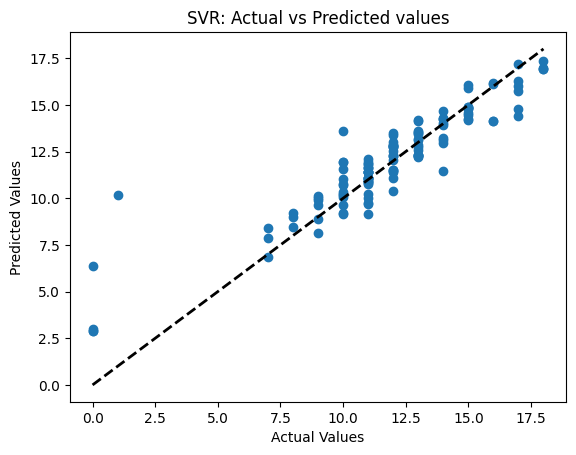

In [ ]:
# Visualizing the results
plt.scatter(y_test, svm_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted values')
plt.show()

In [ ]:
MSE_SVM = mean_squared_error(y_test, svm_pred)
R2_SVM = r2_score(y_test, svm_pred)
print('MEAN SQUARE ERROR = ',MSE_SVM)
print('R2 = ',R2_SVM)

MEAN SQUARE ERROR =  2.018243277535641
R2 =  0.8212998895035216


# Comparison

In [ ]:
result = pd.DataFrame(data={'Model':['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor','Ploynomial Regression','Support Vector Machine'],
                            'MSE': [MSE_LR, MSE_RF, MSE_DTR, MSE_PR, MSE_SVM],
                            'r2_score': [R2_LR, R2_RF, R2_DTR, R2_PR, R2_SVM]})
result

Model       MSE  r2_score
0        Linear Regression  1.804979  0.840183
1  Random Forest Regressor  0.720285  0.936224
2  Decision Tree Regressor  0.453846  0.959815
3    Ploynomial Regression  1.586518  0.859526
4   Support Vector Machine  2.018243  0.821300

In [ ]:
feature_imporatance = RF.feature_importances_
features_and_importances = list(zip(X_train[selected_features].columns,feature_imporatance))
features_and_importances.sort(key=lambda x: x[1], reverse=True)
FM=pd.DataFrame(features_and_importances,columns=['Name','Importance'])
FM

Name  Importance
0           G2    0.832663
1           G1    0.049529
2   traveltime    0.024996
3         Mjob    0.017714
4      address    0.014454
5       health    0.014391
6         Fjob    0.014285
7     failures    0.010232
8          sex    0.008676
9      nursery    0.008242
10      school    0.004816